## Approximation of the natural logarithm using Taylor series. Optimizing the algorithm.

**Simple problem.** Given $x>0$, approximate the natural logarithm at $x$ with a fixed error $\varepsilon$ using Taylor series.

**Taylor Series of the natural logarithm.** If $p>0$, then for any $x\in (0,2p)$ we have that
$$\ln(x)=\ln(p) - \sum_{i=1}^\infty\frac{1}{i}\left(\frac{p-x}{p}\right)^i.$$
Thus, the radius of convergence of the above power series is $p$.

**Important rule.** By looking at the above formula, we notice that the very first term is $\ln(p)$. Obviously, we forbid ourselves to use logarithm in this series. Hence, we constrain ourselves to $p$ of the form $e^K$, where $K$ can be any integer.

**Taylor expansion of a real analytic function.** Let $U$ be an open subset of real numbers and let $f:U\to\mathbb{R}$ be an analytic function. For any $p\in U$ there is an interval $W\subset U$ containing $p$ such that for any $x\in W$,
$$f(x)=\sum_{i=0}^\infty\frac{f^{(i)}(p)}{i!}(x-p)^i.$$
In particular, for any natural number $n\geqslant 1$, there is a function $R_n:W\to\mathbb{R}$ such that for any $x\in W$, 
$$f(x)=\sum_{i=0}^n\frac{f^{(i)}(p)}{i!}(x-p)^i+R_n(x)$$
and $\displaystyle{\lim_{n \to \infty} R_n(x) = 0}$.

Maximal such interval $W$ is called the interval of convergence and it is of the form $(p-r, p+r)$, where $r\in (0, \infty ]$ is the radius of convergence of the power series
$$\sum_{i=0}^\infty\frac{f^{(i)}(p)}{i!}(x-p)^i.$$

**Error estimation problem.** Due to the Taylor formula, we only know that for any natural number $n$,
$$\left|f(x) - \sum_{i=0}^n\frac{f^{(i)}(p)}{i!}(x-p)^i \right|\leqslant \left|R_n(x)\right|$$
and since $\displaystyle{\lim_{n \to \infty} R_n(x) = 0}$, we have that the left hand side converges to $0$ when $n\to\infty$. Thus, the series
$$\sum_{i=0}^\infty\frac{f^{(i)}(p)}{i!}(x-p)^i$$
converges to $f(x)$, but a priori we do not know nothing about how fast is this convergence. The following proposition gives us a sufficeint condition for an effective estimation on the rest $R_n(x)$.

**Proposition.** Assume that $$ \sum_{i=1}^\infty b_i $$ is a series of real numbers convergent to $S$. For each $n\in\mathbb{N}$, let $S_n$ denote the $n$-th partial sum of this series and let $R_n = S - S_n$ be the rest. If for some $n\in\mathbb{N}$, there is a real number $\alpha\in (0,1)$ such that $|b_{i+1}|\leqslant\alpha |b_i|$ for all $i\geqslant n$, then $$|R_n|\leqslant\frac{|b_{n+1}|}{1-\alpha}.$$

**Error estimation.** Let us apply the above proposition to the our case of the natural logarithm. Assume that $p>0$ and $x\in (0,2p)$ are fixed. Thus, we have a series $$\sum_{i=1}^\infty b_i,$$ where 
$$b_i = \frac{1}{i}\left(\frac{p-x}{p}\right)^i.$$ 
Hence, 
$$\frac{|b_{i+1}|}{|b_i|} = \frac{i}{i+1}\left|\frac{x-p}{p}\right|=\frac{i}{i+1}\left|\frac{x}{p}-1\right|.$$ 
Notice yet that
$$x\in(0,2p)\implies \frac{x}{p}\in (0,2) \implies \frac{x}{p}-1\in(-1,1) \implies \left|\frac{x}{p}-1\right|<1\implies \frac{i}{i+1}\left|\frac{x}{p}-1\right|<1.$$
As a result, there is
$$\alpha = \left|\frac{x}{p}-1\right|<1$$
such that $|b_{i+1}|\leqslant \alpha |b_i|$ for all $i\geqslant 1$. By applying the above proposition, we get that
$$|R_n|\leqslant \frac{|b_{n+1}|}{1-\alpha}$$
for all $n\geqslant 1$. But since $|b_{n}| = \frac{\alpha^n}{n}$, we obtain that
$$|R_n|\leqslant \frac{\alpha^{n+1}}{(n+1)(1-\alpha)}.$$

**Main algorithm.** From the above analysis, we have the following algorithm which computes $\ln(x)$ with an error less than $\varepsilon$ starting from $p=e^K$. It also outputs the number of steps required to achieve a desired approximation.

In [1]:
import numpy as np

def approx(x, K, eps, maxSteps):
    p = np.exp(K);
    factor = (p-x)/p;
    alpha = abs(factor);
    sum = K;
    n = 0;
    bn = factor;
    bound = abs(bn)/(1-alpha);
    while (bound > eps):
        n = n + 1;
        sum = sum - bn;
        bn = bn*(n/(n+1))*factor;
        bound = abs(bn)/(1-alpha);
        if (n >= maxSteps):
            return ['Overflow!', maxSteps]
    return [sum, n]

For the sake of the readability, let us format the output to a more convenient form.

In [2]:
def approxMsg(x, K, eps, maxSteps):
    output = approx(x, K, eps, maxSteps);
    if isinstance(output[0], str):
        return print(output[0] + ' In order to compute ln(' + str(x) + ') with an error less than ' + str(eps) + ' starting from p = exp(' + str(K) + ') more than ' + str(maxSteps) + ' are required.')
    else:
        sum = output[0];
        n = output[1];
        return print('Starting from p = exp(' + str(K) + '), we get that ln(' + str(x) + ') = ' + str(sum) + ' with an error less than ' + str(eps) + ' and it was is done in ' + str(n) + ' steps.')

In [3]:
approxMsg(1.9, 0, 0.001, 100);
approxMsg(3.2, 1, 0.0001, 100);

Starting from p = exp(0), we get that ln(1.9) = 0.641805574241 with an error less than 0.001 and it was is done in 50 steps.
Starting from p = exp(1), we get that ln(3.2) = 1.16312033692 with an error less than 0.0001 and it was is done in 4 steps.


**$x$ must be in $(0,2p)$.** In fact, for $x > 2p$, the series
$$\sum_{i=1}^\infty\frac{1}{i}\left(\frac{p-x}{p}\right)^i$$
diverges and so we have to make sure that $x > 2e^K = 2p$ when we call procedure ```approxSteps```. For example if $x=4,5$, then we have to take at least $K=1.$ Below we have a comparison of intervals of convergence for $p=1$ and $p=e^1$. 

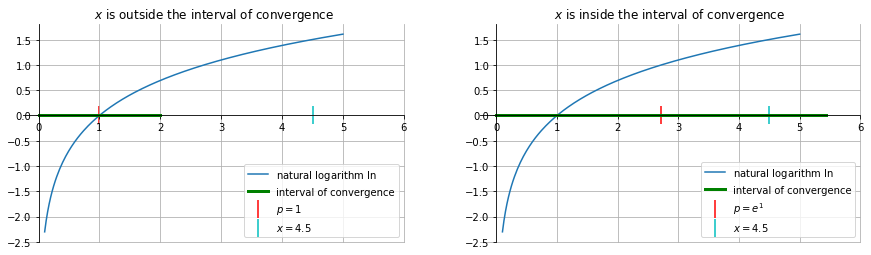

In [4]:
import matplotlib.pyplot as plt

x = np.linspace(0.1, 5,200)

ax = plt.subplots(figsize=(15, 4)) 

plt.subplot(1, 2, 1)

plt.plot(x, np.log(x), label='natural logarithm $\ln$')
plt.plot([2, 0], [0, 0], color = 'g', linewidth = 3, label = 'interval of convergence')
plt.scatter([1],[0], marker = '|', s = 300, color = 'r', label = '$p = 1$')
plt.scatter([4.5],[0], marker = '|', s = 300, color = 'c', label = '$x = 4.5$')

ax = plt.gca()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.grid(True, which='both')

plt.xticks(np.linspace(0,6,7))

plt.title('$x$ is outside the interval of convergence')
plt.legend(loc = 4)

plt.subplot(1, 2, 2)

plt.plot(x, np.log(x), label='natural logarithm $\ln$')
plt.plot([2*np.exp(1), 0], [0, 0], color = 'g', linewidth = 3, label = 'interval of convergence')
plt.scatter([np.exp(1)],[0], marker = '|', s = 300, color = 'r', label = '$p = e^1$')
plt.scatter([4.5],[0], marker = '|', s = 300, color = 'c', label = '$x = 4.5$')

ax = plt.gca()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.grid(True, which='both')

plt.xticks(np.linspace(0,6,7))

plt.title('$x$ is inside the interval of convergence')
plt.legend(loc = 4)

plt.show()

In [5]:
approxMsg(4.5, 1, 0.0001, 100);

Starting from p = exp(1), we get that ln(4.5) = 1.50409449458 with an error less than 0.0001 and it was is done in 17 steps.


**Worst-case scenarios.** If $x$ is close to an edge of the interval of convergence $(0,2p)$, then $\alpha$ is close to $1$ and thus the Taylor series converges very slowly. In fact, for $x=1.999$ and $p=e^0=1$, we need over $1000$ steps to get the approximation with an error less then $\varepsilon = 0.1$, which is quite poor.

In [6]:
approxMsg(1.999, 0, 0.1, 1000);
approxMsg(1.999, 0, 0.1, 10000);

Overflow! In order to compute ln(1.999) with an error less than 0.1 starting from p = exp(0) more than 1000 are required.
Starting from p = exp(0), we get that ln(1.999) = 0.692597018308 with an error less than 0.1 and it was is done in 1744 steps.


In the above case, it is much better to take $p=e^1$. In fact, the procedure ```approxSteps``` requires only 4 steps to compute the value of $\ln(1.999)$ with an error less than $0.001$.

In [7]:
approxMsg(1.999, 1, 0.001, 100);

Starting from p = exp(1), we get that ln(1.999) = 0.692980624253 with an error less than 0.001 and it was is done in 4 steps.


 A similar situation happens for a very small $x$.

In [8]:
approxMsg(0.01, 0, 0.0001, 100);
approxMsg(0.01, 0, 0.0001, 1000);

Overflow! In order to compute ln(0.01) with an error less than 0.0001 starting from p = exp(0) more than 100 are required.
Starting from p = exp(0), we get that ln(0.01) = -4.60508217845 with an error less than 0.0001 and it was is done in 720 steps.


The next figure shows how $x=0.01$ is close to points $p=1$ and $p=e^{-5}$.

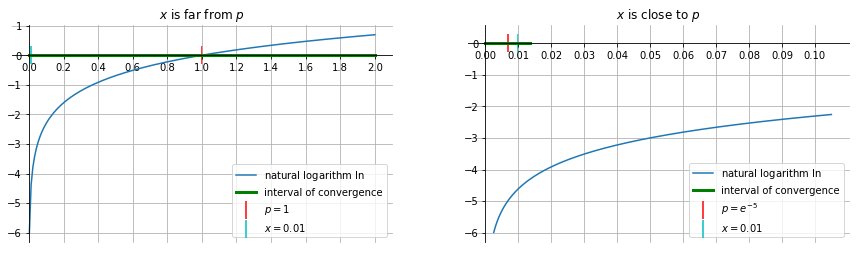

In [9]:
x = np.linspace(0.0025, 2,200)
x2 = np.linspace(0.0025, 0.105,200)

ax = plt.subplots(figsize=(15, 4)) 

plt.subplot(1, 2, 1)

plt.plot(x, np.log(x), label='natural logarithm $\ln$')
plt.plot([2, 0], [0, 0], color = 'g', linewidth = 3, label = 'interval of convergence')
plt.scatter([1],[0], marker = '|', s = 300, color = 'r', label = '$p = 1$')
plt.scatter([0.01],[0], marker = '|', s = 300, color = 'c', label = '$x = 0.01$')

ax = plt.gca()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.grid(True, which='both')

plt.xticks(np.linspace(0,2,11))

plt.title('$x$ is far from $p$')
plt.legend(loc = 4)

plt.subplot(1, 2, 2)

plt.plot(x2, np.log(x2), label='natural logarithm $\ln$')
plt.plot([2*np.exp(-5), 0], [0, 0], color = 'g', linewidth = 3, label = 'interval of convergence')
plt.scatter([np.exp(-5)],[0], marker = '|', s = 300, color = 'r', label = '$p = e^{-5}$')
plt.scatter([0.01],[0], marker = '|', s = 300, color = 'c', label = '$x = 0.01$')

ax = plt.gca()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.grid(True, which='both')

plt.xticks(np.linspace(0,0.1,11))

plt.title('$x$ is close to $p$')
plt.legend(loc = 4)

plt.show()

If we compare
$$\alpha = \left|\frac{x}{p}-1\right|$$
for $x=0.01$ and $p=1$ vs $p=e^{-5}$, then we get that $\alpha$ is significantly smaller in the latter case. 

In [10]:
x = 0.01;
p = 1;
print(np.abs(x/p - 1));
p = np.exp(-5);
print(np.abs(x/p - 1));

0.99
0.484131591026


Thus, we have that the procedure ```approxSteps``` with $p=e^{-5}$ outruns the one with $p=1$.

In [11]:
approxMsg(0.01, 0, 0.01, 1000);
approxMsg(0.01, -5, 0.01, 1000);

Starting from p = exp(0), we get that ln(0.01) = -4.59720021769 with an error less than 0.01 and it was is done in 337 steps.
Starting from p = exp(-5), we get that ln(0.01) = -4.60365065658 with an error less than 0.01 and it was is done in 5 steps.


**Advanced problem.** Given a point $x$, find $p=e^K$ such that for every error $\varepsilon$, the procedure ```approxSteps``` terminates in the least amount of steps.

**Optimization.** Assume that $x\in (e^K,2e^K)$ for some $K\geqslant 0$. For such $x$, we have to choose $p=e^K$ or $p=e^{K+1}$ to optimize ```approxSteps```. The natural question arises. For how big $x$ we should take $p=e^{K+1}$? We choose $p$, so that $\left|\frac{x-p}{r}\right|$ is the smallest, where $r$ is the radius of the convergence of the Taylor series of $\ln$ expanded at $p$. Since $x\in (e^K,2e^K)$, we have that $x=Ce^K$ for some $C\in (1,2)$. Thus, we look for $C_0\in(1,2)$ such that
$$\frac{C_0e^K-e^K}{e^K} = \frac{e^{K+1} - C_0e^K}{e^{K+1}}.$$
Form the above, we obtain that $C_0=\frac{2e}{e+1}$. Fortunately, $C_0$ is independent of $K$ and so it very easy to determine which $p$ should be taken. We just choose $p = e^K$, where $K$ is the least natural number such that $C_0 e^K > x$. Similarly, if $x<1$, then we have an analogous reasoning and we just choose the greatest integer $K$ such that $C_0 e^{K-1} \leqslant x$ 

**It is important to notice,** that we did **not** prove that $C_0$ is the best choice. We only used some heuristic reasoning to obtain this number $C_0$. Hence, we will test if there are other better choices for $C$. Just below we have a procedure ```setCenter``` which takes $x$, $C\in (1,2)$ and returns $K$ such that $x\in [Ce^{K-1}, Ce^K)$.

In [12]:
def setCenter(x,C):
    K = 0;
    if (x >= 1):
        while (C*np.exp(K) <= x):
            K = K + 1
    else:
        while (C*np.exp(K - 1) > x):
            K = K - 1
    return K

Let us see if this approach actually works.

In [13]:
eps = 0.000001;
maxSteps = 100;
C0 = 2 * np.exp(1) / (1 + np.exp(1));

def setCenterAndApprox(x, eps, maxSteps, C):
    K = setCenter(x, C);
    return approx(x, K, eps, maxSteps)

def improvedApproxMsg(x, eps, maxSteps, C):
    K = setCenter(x, C);
    return approxMsg(x, K, eps, maxSteps)

In [14]:
improvedApproxMsg(1.999, eps, maxSteps, C0);
improvedApproxMsg(0.0001, eps, maxSteps, C0);
improvedApproxMsg(383, eps, maxSteps, C0);

Starting from p = exp(1), we get that ln(1.999) = 0.692647983927 with an error less than 1e-06 and it was is done in 8 steps.
Starting from p = exp(-9), we get that ln(0.0001) = -9.2103401198 with an error less than 1e-06 and it was is done in 7 steps.
Starting from p = exp(6), we get that ln(383) = 5.94803505871 with an error less than 1e-06 and it was is done in 4 steps.


**Great!** Our choice of $C_0$ seems to work. We have a few neat approximations on $\ln$ which were done in less then 10 steps.

Now, we are going to compute the average number of steps of ```approxSteps``` for random numbers from the interval $(0,10)$. We will do it for evenly spaced values $C$ and later we will compare it with our $C_0$. 

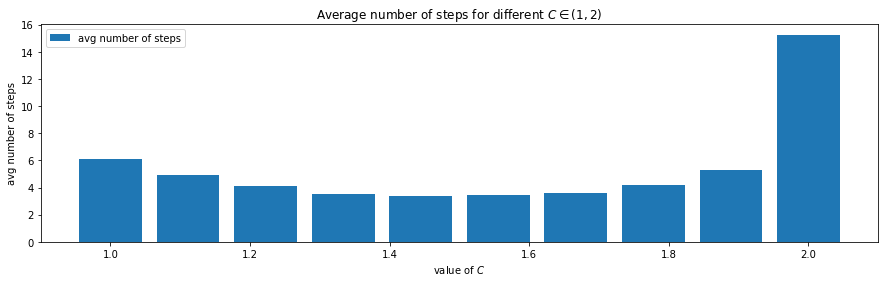

The exact values:  [6.08, 4.944, 4.114, 3.494, 3.379, 3.431, 3.61, 4.205, 5.307, 15.259]


In [15]:
eps = 0.001;
maxSteps = 1000;

sampleSize = 1000;
begin = 0;
end = 10;
sample = np.random.uniform(begin, end, sampleSize);

numberOfCs = 10;
Cs = np.linspace(1, 2, numberOfCs);

def setOfNumberOfStepsForSample(eps, maxSteps, C, sample):
    def numberOfSteps(x):
        return setCenterAndApprox(x, eps, maxSteps, C)[1]
    return list(map(numberOfSteps, sample))             

def setOfAvgNumberOfStepsForSample(eps, maxSteps, Cs, sample):
    def avgNumberOfStepsForSample(C):
        setOfNumbers = setOfNumberOfStepsForSample(eps, maxSteps, C, sample);
        return float(sum(setOfNumbers) / (len(setOfNumbers)))
    return list(map(avgNumberOfStepsForSample, Cs))

ListOfavgNumberOfSteps = setOfAvgNumberOfStepsForSample(eps, maxSteps, Cs, sample);

ax = plt.subplots(figsize=(15, 4)) 

widthOfBar = 0.9 / numberOfCs;
plt.bar(Cs, ListOfavgNumberOfSteps, label='avg number of steps', width = widthOfBar)
    
plt.xlabel("value of $C$")
plt.ylabel("avg number of steps")
plt.title('Average number of steps for different $C\in (1, 2)$')
plt.legend()
plt.show()

print('The exact values: ', ListOfavgNumberOfSteps)

We see that appropriate choice of $C$ decreases the number of steps drastically. For $C$ close to $1.5$, the average number of steps required to compute $\ln$ with an error less then $0.001$ is smaller than $4$ steps. From the above chart, we see that the best $C$ is between $1.4$ and $1.6$. Hence, we will check the average number of steps for these $C$ but with a smaller error $\varepsilon$.

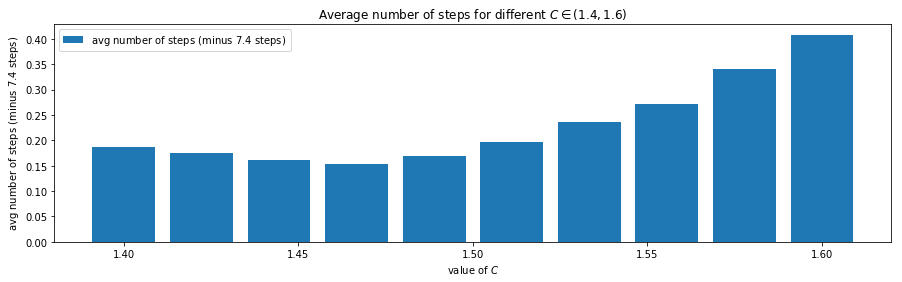

The exact values:  [ 0.186  0.175  0.161  0.154  0.17   0.197  0.237  0.272  0.341  0.408]


In [16]:
eps = 0.000001;
maxSteps = 1000;

sampleSize = 1000;
begin = 0;
end = 10;
sample = np.random.uniform(begin, end, sampleSize);

numberOfCs = 10;
CMin = 1.4;
CMax = 1.6;
Cs = np.linspace(CMin, CMax, numberOfCs);

ListOfavgNumberOfSteps = np.subtract(setOfAvgNumberOfStepsForSample(eps, maxSteps, Cs, sample), 7.4);

ax = plt.subplots(figsize=(15, 4)) 

widthOfBar = 0.9 * (CMax - CMin) / numberOfCs;
plt.bar(Cs, ListOfavgNumberOfSteps, label='avg number of steps (minus $7.4$ steps)', width = widthOfBar)
    
plt.xlabel("value of $C$")
plt.ylabel("avg number of steps (minus $7.4$ steps)")
plt.title('Average number of steps for different $C\in (1.4, 1.6)$')
plt.legend()
plt.show()

print('The exact values: ', ListOfavgNumberOfSteps)

For the sake of the readability, we subtracted $7.4$ steps from averages in the above chart. We notice that the above chart is little asymmetric. It is a good indicator for us because $C_0 = \frac{2e}{1 + e}\approx 1.462$ which is less than $1.5$. 

**Finally,** we test our choice of $C_0$ against other numbers $C\in (1.45, 1.5)$. We will see if there is a single value $x$ and a number $C$ such that ```setCenterAndApprox``` terminates in less steps for $C$ than $C_0$. We check it with the fixed error $\varepsilon = 0.00001$.

In [17]:
eps = 0.00001;
maxSteps = 1000;

sampleSize = 1000;
begin = 0;
end = 10;
sample = np.random.uniform(begin, end, sampleSize);

C0 = 2 * np.exp(1) / (1 + np.exp(1));
numberOfCs = 20;
CMin = 1.45;
CMax = 1.5;
Cs = np.linspace(CMin, CMax, numberOfCs);

def compareStepsC0vsC(x, eps, maxSteps, C):
    stepsC = setCenterAndApprox(x, eps, maxSteps, C)[1];
    stepsC0 = setCenterAndApprox(x, eps, maxSteps, C0)[1];
    if (stepsC < stepsC0): 
        return 0
    else: 
        return 1

def compareStepsC0vsAllOnSample(eps, maxSteps, Cs, sample):
    finalOutput = 1;
    for C in Cs:
        for x in sample:
            output = compareStepsC0vsC(x, eps, maxSteps, C);
            if (output == 0):
                print('For x = ' + str(x) + ', the algorithm terminates in less steps for C = ' + str(C) + ' than for C0')
            finalOutput = finalOutput * output 
    if (finalOutput == 1):
        return print('Good work! C0 looks to be the best one.')
    else:
        return print('Algorithm terminates quicker for the above valuse')
        
compareStepsC0vsAllOnSample(eps, maxSteps, Cs, sample);

Good work! C0 looks to be the best one.


**Conclusion.** For any $x$, the procedure ```setCenterAndApprox``` with $C_0$ outruns all other numbers $C$. Thus, in order to compute $\ln(x)$ using Taylor series, it is best to start with $p = e^K$, where $K$ is such that $x\in [C_0e^{K-1}, C_0e^{K})$.